<a href="https://colab.research.google.com/github/amulyakamatagi/python-moments-of-business/blob/main/customer_segmentation_(mini_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING THE LIBARARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


In [4]:
sns.set_theme(style="whitegrid")

In [6]:
table=pd.read_csv("Mall_Customers.csv")
table.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
187,188,Male,28,101,68
199,200,Male,30,137,83
117,118,Female,49,65,59
183,184,Female,29,98,88
13,14,Female,24,20,77


# UNDERSTANDING THE DATA

In [7]:
table.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
table.shape

(200, 5)

In [9]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
table.isnull().sum()*100

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


<Axes: >

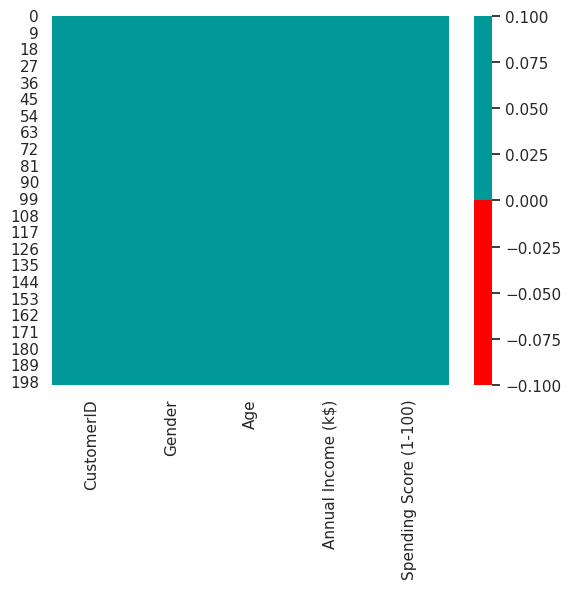

In [12]:
cols=table.columns
color=["#ff0000","#009999"]
sns.heatmap(table[cols].isnull(),cmap=sns.color_palette(color))


In [11]:
table[table.duplicated()].shape

(0, 5)

# STATISTICAL OVERVIEW

In [13]:
table.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [14]:
a=table["Age"]
b=table["Annual Income (k$)"]
c=table["Spending Score (1-100)"]

In [17]:
mean=a.mean()
median=a.median()

<ipython-input-18-aecea947e477>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




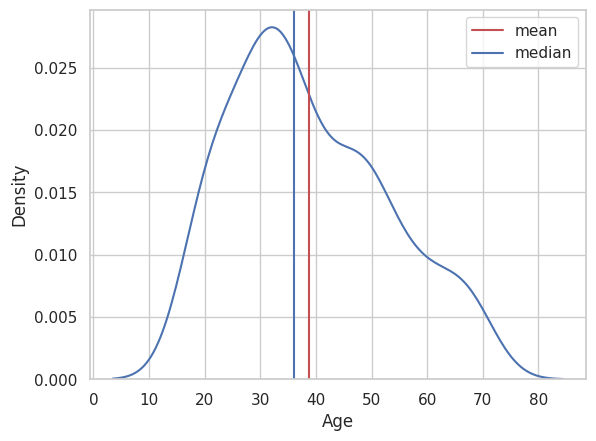

In [18]:
sns.distplot(a,hist=False)
plt.axvline(mean,color="r",label="mean")
plt.axvline(median,color="b",label="median")
plt.legend()
plt.show()

<ipython-input-19-0534ba0f0ea1>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




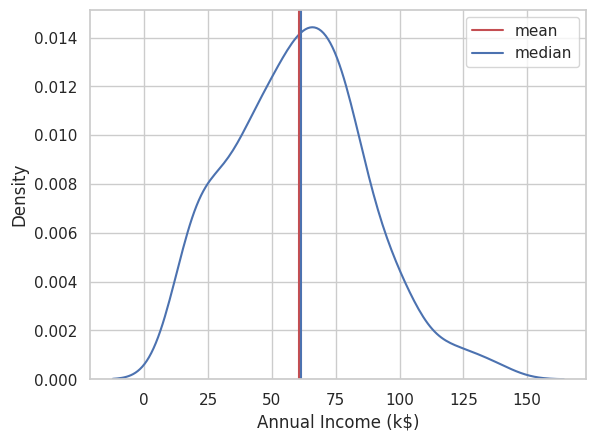

In [19]:
mean=b.mean()
median=b.median()
sns.distplot(b,hist=False)
plt.axvline(mean,color="r",label="mean")
plt.axvline(median,color="b",label="median")
plt.legend()
plt.show()


<ipython-input-20-26c2bc84abc3>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




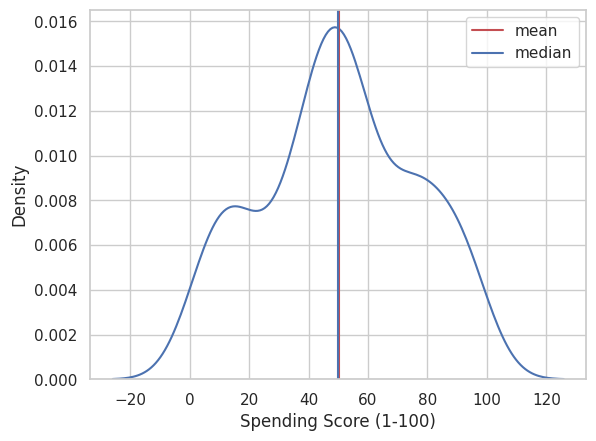

In [20]:
mean=c.mean()
median=c.median()
sns.distplot(c,hist=False)
plt.axvline(mean,color="r",label="mean")
plt.axvline(median,color="b",label="median")
plt.legend()
plt.show()

**INFERENCE:**
* both Annual income and spending ratio follows Normal Ratio as both mean and median are overlapping making it equal(mean = median)
* While Age column is bit skewed as the mean> median

In [28]:
crosstab=pd.crosstab(table["Age"],table["Annual Income (k$)"])

total_income_by_age=crosstab.dot(crosstab.columns)

highest_income_age_group=total_income_by_age.idxmax()
highest_income_amount=total_income_by_age.max()

print(f"the age group earning more income is {highest_income_age_group} with income of {highest_income_amount}$")

the age group earning more income is 32 with income of 959$


In [30]:
crosstab=pd.crosstab(table["Age"],table["Spending Score (1-100)"])

total_spending_by_age=crosstab.sum(axis=1)

highest_spending_age_group=total_spending_by_age.idxmax()
income_amount=total_spending_by_age.max()

print(f"the age group apending more  is {highest_spending_age_group} with income of {income_amount}$")

the age group apending more  is 32 with income of 11$


# VISUALIZATIONS-UNIVARIATE/BIVARIATE/MULTIVARIATE ANALYSIS

In [31]:
# Univariate analysis


px.bar(table,x="Annual Income (k$)")

In [39]:
px.histogram(table,x="Spending Score (1-100)")

In [33]:
# Bivariate Analysis

px.bar(table,x="Age",y="Annual Income (k$)",color="Annual Income (k$)")

In [34]:
px.bar(table,x="Gender",y="Annual Income (k$)",color="Gender")

In [41]:
px.bar(table,x="Age",y="Spending Score (1-100)",color="Age")

In [42]:
px.bar(table,x="Gender",y="Spending Score (1-100)",color="Gender")

In [43]:
fig=px.histogram(table,x="Age",y="Spending Score (1-100)",color="Gender")
fig.show()

# INFERENCE:
* The Annual Income of Female seems to be more compared to Male Annual Income ratio same as spending ratio
* from the above plot , we can also say that male and female within the (30-34) age has the highest spending ratio .
* However , spending ratio of female is more than male
* lowest spending age group of both male and female lies in the range of (60-74)
* to sum up , male and female falling under the age of 32 have the record of spending higher with 11k$

# DATA PREPROCESSING

In [45]:
data=table.iloc[:,[3,4]]

In [46]:
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
21,24,73
80,54,51
48,40,42
118,67,43
43,39,61


In [51]:
x=data.values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [52]:
from sklearn.preprocessing import StandardScaler
trans=StandardScaler()
scaled_data=pd.DataFrame(trans.fit_transform(data))

In [53]:
scaled_data

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [54]:
# displaying the effects of scaling

Text(0.5, 1.0, 'After Scaling')

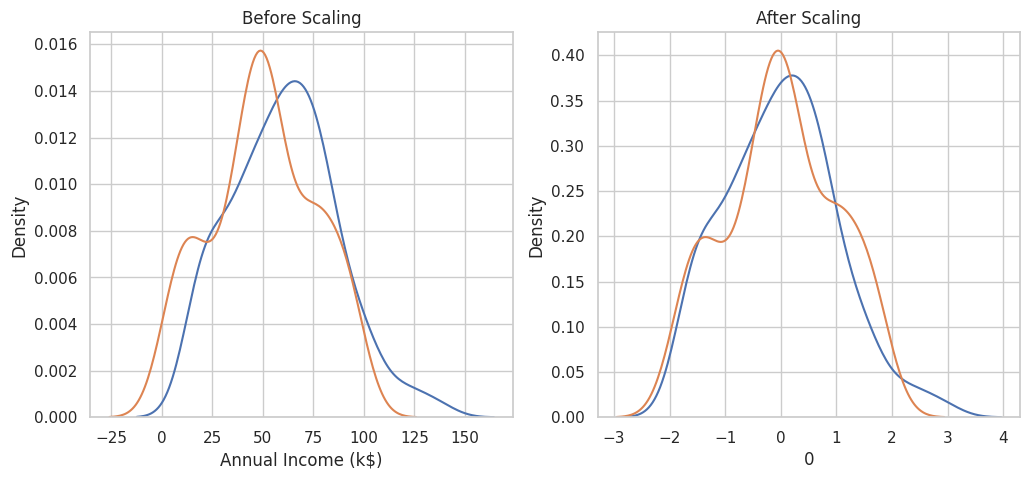

In [56]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(table["Annual Income (k$)"],ax=ax1)
sns.kdeplot(table["Spending Score (1-100)"],ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(scaled_data[0],ax=ax2)
sns.kdeplot(scaled_data[1],ax=ax2)
ax2.set_title("After Scaling")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

Text(0.5, 1.0, 'KMEANS CLUSTERING')

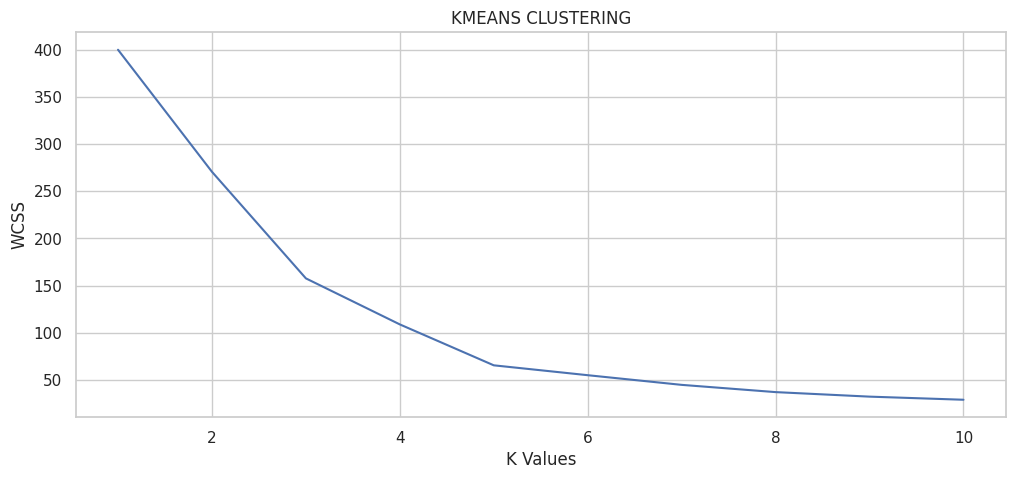

In [58]:
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(12,5))
wcss=[]
for i in range(1,11):
  clf=KMeans(n_clusters=i)
  clf.fit(scaled_data)
  wcss.append(clf.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("K Values")
plt.ylabel("WCSS")
plt.title("KMEANS CLUSTERING")


In [65]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=0)
Y=kmeans.fit_predict(x)
print(Y)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



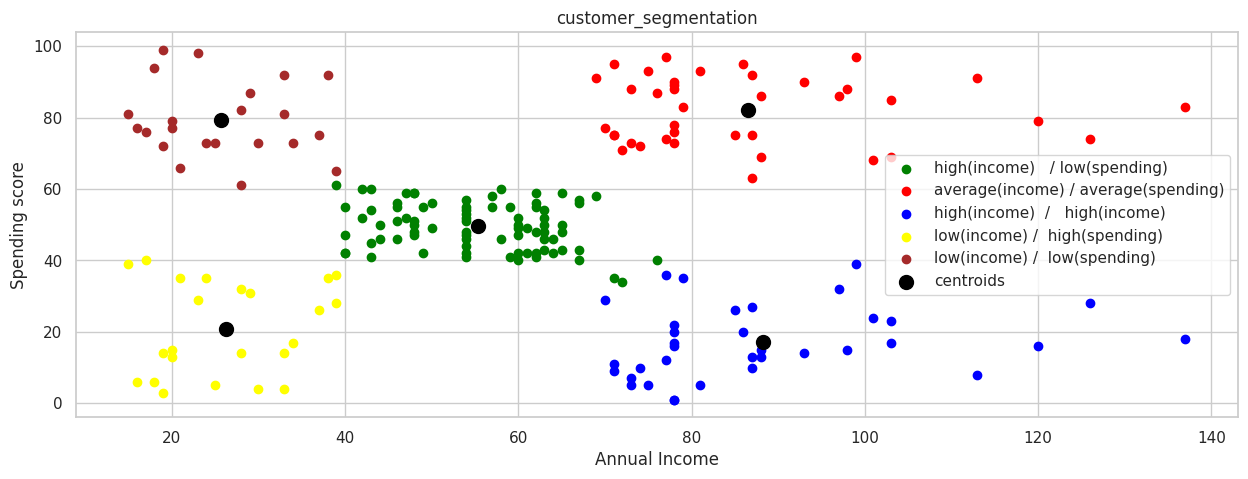

In [66]:
plt.figure(figsize=(15,5))
plt.scatter(x[Y==0,0],x[Y==0,1],c="green",label="high(income)   / low(spending)")
plt.scatter(x[Y==1,0],x[Y==1,1],c="red",label="average(income) / average(spending)")
plt.scatter(x[Y==2,0],x[Y==2,1],c="blue",label="high(income)  /   high(income)")
plt.scatter(x[Y==3,0],x[Y==3,1],c="yellow",label="low(income) /  high(spending)")
plt.scatter(x[Y==4,0],x[Y==4,1],c="brown",label="low(income) /  low(spending)")


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="centroids")
plt.title("customer_segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

# **KEY TAKEAWAYS**

* customers with high income and but with low spending ratio belong to cluster 1
* customers with average income and average spending belong to cluster 2
* customers with high income and high spending belong to cluster 3
* customers with low income and high spending belong to cluster 4
* customers with low income and low spending belong to cluster 5



